In [1]:
import sys
sys.executable

'c:\\Users\\09048\\2026project\\icecream-sales-forecasting\\venv\\Scripts\\python.exe'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 경로
data_path = '../01_Data/raw/'

icecream = pd.read_csv(data_path + 'icecream.csv')
menu_list = pd.read_csv(data_path + 'menu_list.csv')
price_increase = pd.read_csv(data_path + 'price_increase.csv')
sales_bymenu = pd.read_csv(data_path + 'sales_bymenu.csv')
sales_creditcard = pd.read_csv(data_path + 'sales_creditcard.csv')
sales_dayoftheweek = pd.read_csv(data_path + 'sales_dayoftheweek.csv')
sales_hourly = pd.read_csv(data_path + 'sales_hourly.csv')
sales_monthly = pd.read_csv(data_path + 'sales_monthly.csv')

C:\Users\09048\AppData\Local\Temp\ipykernel_2208\1655386509.py:4: DtypeWarning: Columns (0: 신용카드승인내역_주문내역, 1: Column5, 2: Column6, 3: Column7, 4: Column12, 5: Column13, 6: Column16, 7: Column17) have mixed types. Specify dtype option on import or set low_memory=False.
  icecream = pd.read_csv(data_path + 'icecream.csv')
C:\Users\09048\AppData\Local\Temp\ipykernel_2208\1655386509.py:8: DtypeWarning: Columns (0: 신용카드승인내역_주문내역, 1: Column5, 2: Column6, 3: Column7, 4: Column12, 5: Column13, 6: Column16, 7: Column17) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_creditcard = pd.read_csv(data_path + 'sales_creditcard.csv')


In [4]:
# 1행을 column으로 지정한 후 0행 삭제

icecream = icecream.rename(columns=icecream.iloc[0])
icecream = icecream.drop(icecream.index[0])
icecream.head()

,신용카드승인내역_주문내역_20230215184531.xlsx,번호,영업일자,간편결제구분,카드번호,승인번호,승인금액,할부,승인일자,승인시간,매입사,처리,기기번호,영수번호,메뉴코드,메뉴명,판매가격,판매수량
1,신용카드승인내역_주문내역_20230215184531.xlsx,1,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000867,빼빼로바,600.0,1.0
2,신용카드승인내역_주문내역_20230215184531.xlsx,2,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000463,초코쿠키바,400.0,1.0
3,신용카드승인내역_주문내역_20230215184531.xlsx,3,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000705,가나 아이스바,600.0,2.0
4,신용카드승인내역_주문내역_20230215184531.xlsx,4,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000531,체리마루바,400.0,1.0
5,신용카드승인내역_주문내역_20230215184531.xlsx,5,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000813,빵빠레 초코,1000.0,1.0


In [5]:
# 위에서 확인한 불필요한 컬럼 삭제
icecream = icecream.drop(columns=['신용카드승인내역_주문내역_20230215184531.xlsx', '간편결제구분', '기기번호', '할부', '처리'])
icecream.head()

,번호,영업일자,카드번호,승인번호,승인금액,승인일자,승인시간,매입사,영수번호,메뉴코드,메뉴명,판매가격,판매수량
1,1,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000867,빼빼로바,600.0,1.0
2,2,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000463,초코쿠키바,400.0,1.0
3,3,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000705,가나 아이스바,600.0,2.0
4,4,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000531,체리마루바,400.0,1.0
5,5,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000813,빵빠레 초코,1000.0,1.0


In [6]:
# 데이터 타입 변경(메모리 효율화, 올바른 데이터 타입 매칭을 위해)

icecream = icecream.astype({'번호':'float64',
                            '승인번호':'float64',
                            '승인금액':'float64',
                            '판매가격':'float64',
                            '판매수량':'float64'})


# 영업일자, 승인일자 열의 데이터 형식 변경(object(string) -> datetime)
icecream['영업일자'] = pd.to_datetime(icecream['영업일자'], format="%Y-%m-%d")
icecream['승인일자'] = pd.to_datetime(icecream['승인일자'], format="%Y-%m-%d")

# 승인시간을 datetime 형식으로 변환 (시간만 남기기)
icecream['승인시간'] = pd.to_datetime(icecream['승인시간'], format='%H:%M:%S', errors='coerce').dt.time


print(icecream.dtypes)

번호             float64
영업일자    datetime64[us]
카드번호               str
승인번호           float64
승인금액           float64
승인일자    datetime64[us]
승인시간            object
매입사                str
영수번호            object
메뉴코드               str
메뉴명                str
판매가격           float64
판매수량           float64
dtype: object


In [7]:
# 실제 판매금액 컬럼 만들기
icecream['실제판매금액'] = icecream['판매가격'] * icecream['판매수량']

# 아이스크림별 매출 TOP 10
# 아이스크림별로 아이스크림가격을 합하여 값을 정렬 시킨 Series로 icecream_by_revenue라는 변수에 저장 후 출력
revenue_by_icecream = icecream.groupby('메뉴명')['실제판매금액'].sum().sort_values(ascending=False)
print(revenue_by_icecream.head(10))

메뉴명
월드콘            1036400.0
떡붕어싸만코          989600.0
누가바             765500.0
메로나             726800.0
마카롱             718400.0
비비빅             684200.0
엑셀런트            681500.0
투게더             607000.0
롯데일품팥빙수         578000.0
셀렉션  더 싱글초코     556500.0
Name: 실제판매금액, dtype: float64


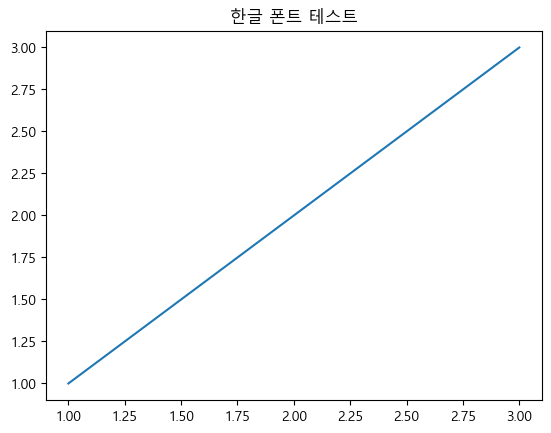

In [8]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 마이너스 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)

# 확인용 테스트
plt.title('한글 폰트 테스트')
plt.plot([1, 2, 3], [1, 2, 3])
plt.show()

# 새로시작.

In [10]:
# 1. menu_list 파일 로드 (경로 확인 필수)
menu_list = pd.read_csv(data_path + 'menu_list.csv')

In [12]:
menu_list.head()

,분류,메뉴코드,바코드번호,관리메뉴명,메뉴명_한국어,메뉴명_영어,메뉴명_일본어,메뉴명_중국어,메뉴설명_한국어,메뉴설명_영어,...,판매갯수제한,판매여부,성인인증여부,과세여부,표시시작일자,표시종료일자,판매불가요일,연동코드,매입처,야간가격
0,상품,B0000003,8801104123181,비비빅,비비빅,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
1,상품,B0000004,8801104123174,메로나,메로나,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
2,상품,B0000005,8801019508356,누가바,누가바,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
3,상품,B0000006,8801019508431,쌍쌍바,쌍쌍바,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
4,상품,B0000007,8801019508363,바밤바,바밤바,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN


- 관리메뉴명이랑 메뉴명_한국어 일치하는지 확인

In [17]:
# 1. 두 컬럼의 값이 완벽히 일치하는 행의 개수 확인
# 앞뒤 공백으로 인한 오류를 방지하기 위해 strip()을 적용한 후 비교합니다.
is_equal = (menu_list['관리메뉴명'].str.strip() == menu_list['메뉴명_한국어'].str.strip()).all()

if is_equal:
    print("✅ 결과: '관리메뉴명'과 '메뉴명_한국어가'가 모든 행에서 100% 일치합니다.")
else:
    # 일치하지 않는 데이터가 몇 개인지 확인
    diff_count = (menu_list['관리메뉴명'].str.strip() != menu_list['메뉴명_한국어'].str.strip()).sum()
    print(f"⚠️ 결과: {diff_count}개의 데이터가 서로 다릅니다. 내용을 확인해봐야 합니다.")
    
    # 다른 데이터 샘플 출력
    display(menu_list[menu_list['관리메뉴명'].str.strip() != menu_list['메뉴명_한국어'].str.strip()])

⚠️ 결과: 30개의 데이터가 서로 다릅니다. 내용을 확인해봐야 합니다.


,분류,메뉴코드,바코드번호,관리메뉴명,메뉴명_한국어,메뉴명_영어,메뉴명_일본어,메뉴명_중국어,메뉴설명_한국어,메뉴설명_영어,...,판매갯수제한,판매여부,성인인증여부,과세여부,표시시작일자,표시종료일자,판매불가요일,연동코드,매입처,야간가격
254,상품,B0000257,8801019514210,초코마루,초코마루4500,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
255,상품,B0000258,8801019514197,호두마루,호두마루4500,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
548,상품,B0000551,8809713220154,누가바 쇼콜라,800 누가바 쇼콜라083083,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
549,상품,B0000552,8809713220161,바밤바 흑당버블티바,800 바밤바 흑당버블티바083093,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
554,상품,B0000557,8809713220291,팥빙수,3000 팥빙수093608,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
555,상품,B0000558,8809713220321,폭신폭신솜사탕바,폭신폭신솜사탕바083074,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
558,상품,B0000561,8809713220383,부라보초코청크마일드,1500 부라보초코청크마일드OP082042,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
565,상품,B0000568,8809713220550,호두마루홈,5500 호두마루홈081110,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
568,상품,B0000571,8809713220567,부라보홈 바닐라,4500 부라보홈 바닐라NP081108,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
569,상품,B0000572,8809713220093,아이스가이피치,2500 아이스가이피치OP093628,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN


In [18]:
# 1. 어떤 컬럼이 있는지 출력해서 확인
print(menu_list.columns)

# 2. 필요한 컬럼만 골라서 menu_list 업데이트 (예: '관리메뉴명', '카테고리'만 남기기)
# 실제 컬럼명을 보고 아래 리스트를 수정하세요.
cols_to_keep = ['분류', '메뉴코드', '바코드번호', '관리메뉴명', '메뉴명_한국어', '판매가격'] 
menu_list = menu_list[cols_to_keep]

# 3. 중복 데이터 제거 (메뉴 리스트에 같은 이름이 여러 개 있으면 머지할 때 데이터가 뻥튀기됩니다)
menu_list = menu_list.drop_duplicates(subset=['관리메뉴명'])

Index(['분류', '메뉴코드', '바코드번호', '관리메뉴명', '메뉴명_한국어', '메뉴명_영어', '메뉴명_일본어',
       '메뉴명_중국어', '메뉴설명_한국어', '메뉴설명_영어', '메뉴설명_일본어', '메뉴설명_중국어', '판매가격',
       '포장가격', '아이콘표시', '판매시작시간', '판매종료시간', '판매갯수제한', '판매여부', '성인인증여부', '과세여부',
       '표시시작일자', '표시종료일자', '판매불가요일', '연동코드', '매입처', '야간가격'],
      dtype='str')


In [19]:
# 1. 병합의 기준이 되는 '관리메뉴명' 컬럼의 앞뒤 공백 제거
icecream['메뉴명'] = icecream['메뉴명'].str.strip()
menu_list['관리메뉴명'] = menu_list['관리메뉴명'].str.strip()

# 2. 데이터 병합 (Left Join)
# icecream 데이터(판매 기록)를 기준으로 menu_list의 정보를 가져옵니다.
merged_df = pd.merge(icecream, menu_list, left_on='메뉴명', right_on='관리메뉴명', how='left')

# 3. 병합 결과 확인
print(f"판매 데이터 행 개수: {len(icecream)}")
print(f"병합 후 데이터 행 개수: {len(merged_df)}") # 두 숫자가 같아야 정상입니다！

# 4. 결측치 확인 (매칭되지 않은 메뉴가 있는지)
nan_count = merged_df['분류'].isna().sum()
if nan_count > 0:
    print(f"\n⚠️ 주의: menu_list와 매칭되지 않은 메뉴가 {nan_count}건 있습니다.")
    print("매칭되지 않은 주요 메뉴들:")
    print(merged_df[merged_df['분류'].isna()]['관리메뉴명'].unique()[:10])
else:
    print("\n✅ 모든 메뉴가 성공적으로 매칭되었습니다!")

display(merged_df.head())

판매 데이터 행 개수: 36885
병합 후 데이터 행 개수: 36936

⚠️ 주의: menu_list와 매칭되지 않은 메뉴가 1370건 있습니다.
매칭되지 않은 주요 메뉴들:
<StringArray>
[nan, '빙빙 인절미맛', '지도표 성경김부각', '히츨러 히치스 머메이드 수수깡젤리', '윈윈 수박모양젤리']
Length: 5, dtype: str


,번호,영업일자,카드번호,승인번호,승인금액,승인일자,승인시간,매입사,영수번호,메뉴코드_x,메뉴명,판매가격_x,판매수량,실제판매금액,분류,메뉴코드_y,바코드번호,관리메뉴명,메뉴명_한국어,판매가격_y
0,1.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000867,빼빼로바,600.0,1.0,600.0,상품,B0000867,8801062877959,빼빼로바,빼빼로바,600.0
1,2.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000463,초코쿠키바,400.0,1.0,400.0,상품,B0000463,8801206002032,초코쿠키바,초코쿠키바,500.0
2,3.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000705,가나 아이스바,600.0,2.0,1200.0,상품,B0000705,8801062880454,가나 아이스바,가나 아이스바,600.0
3,4.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000531,체리마루바,400.0,1.0,400.0,상품,B0000531,8809713220314,체리마루바,체리마루바,500.0
4,5.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000813,빵빠레 초코,1000.0,1.0,1000.0,상품,B0000813,8801118256301,빵빠레 초코,빵빠레 초코,1000.0


In [22]:
# 1. 병합 전 공백 제거 (매칭 확률 극대화)
icecream['메뉴명'] = icecream['메뉴명'].str.strip()
menu_list['관리메뉴명'] = menu_list['관리메뉴명'].str.strip()

# 2. 중복 제거된 메뉴 리스트 준비 (아까 만든 clean 버전 활용)
menu_list_unique = menu_list.drop_duplicates(subset=['관리메뉴명'], keep='first')

# 3. 이름이 다른 두 컬럼을 기준으로 병합 (Left Join)
# left_on은 icecream 쪽, right_on은 menu_list 쪽 컬럼명입니다.
merged_df = pd.merge(
    icecream, 
    menu_list_unique, 
    left_on='메뉴명', 
    right_on='관리메뉴명', 
    how='left'
)

# 4. 결과 검증
print(f"원래 판매 데이터 개수: {len(icecream)}")
print(f"병합 후 데이터 개수: {len(merged_df)}") # 이제 36,885개로 딱 맞아야 합니다!
print(f"매칭 실패(NaN) 건수: {merged_df['분류'].isna().sum()}건")

display(merged_df.head())

원래 판매 데이터 개수: 36885
병합 후 데이터 개수: 36885
매칭 실패(NaN) 건수: 1370건


,번호,영업일자,카드번호,승인번호,승인금액,승인일자,승인시간,매입사,영수번호,메뉴코드_x,메뉴명,판매가격_x,판매수량,실제판매금액,분류,메뉴코드_y,바코드번호,관리메뉴명,메뉴명_한국어,판매가격_y
0,1.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000867,빼빼로바,600.0,1.0,600.0,상품,B0000867,8801062877959,빼빼로바,빼빼로바,600.0
1,2.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000463,초코쿠키바,400.0,1.0,400.0,상품,B0000463,8801206002032,초코쿠키바,초코쿠키바,500.0
2,3.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000705,가나 아이스바,600.0,2.0,1200.0,상품,B0000705,8801062880454,가나 아이스바,가나 아이스바,600.0
3,4.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000531,체리마루바,400.0,1.0,400.0,상품,B0000531,8809713220314,체리마루바,체리마루바,500.0
4,5.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000813,빵빠레 초코,1000.0,1.0,1000.0,상품,B0000813,8801118256301,빵빠레 초코,빵빠레 초코,1000.0


In [26]:
# 1. 지표 추출 함수
def get_row(df):
    rev = df['실제판매금액'].sum()
    qty = df['판매수량'].sum()
    cnt = df['승인번호'].nunique()
    return [rev, qty, cnt, (rev / cnt if cnt > 0 else 0)]

# 2. 데이터프레임 생성
report = pd.DataFrame([
    get_row(before_df),
    get_row(after_df)
], 
index=['인상 전(1~2월)', '인상 후(3~4월)'],
columns=['총 매출액', '총 판매수량', '방문 건수(영수증)', '평균 객단가'])

# 3. 변화율(%) 행 추가 (가독성을 위해 행으로 추가)
diff = ((report.loc['인상 후(3~4월)'] - report.loc['인상 전(1~2월)']) / report.loc['인상 전(1~2월)'] * 100).round(2)
report.loc['변화율(%)'] = diff

# 4. 출력
print("--- 2022년 3월 가격 인상 전후 지표 비교 ---")
display(report)

--- 2022년 3월 가격 인상 전후 지표 비교 ---


,총 매출액,총 판매수량,방문 건수(영수증),평균 객단가
인상 전(1~2월),3568900.0,4440.00,664.00,5374.849398
인상 후(3~4월),5224800.0,6160.00,944.00,5534.745763
변화율(%),46.4,38.74,42.17,2.970000


--- 가격 인상 전후 변화율 (%) ---
매출액     46.40
판매수량    38.74
방문건수    42.17
Name: 인상 후, dtype: float64


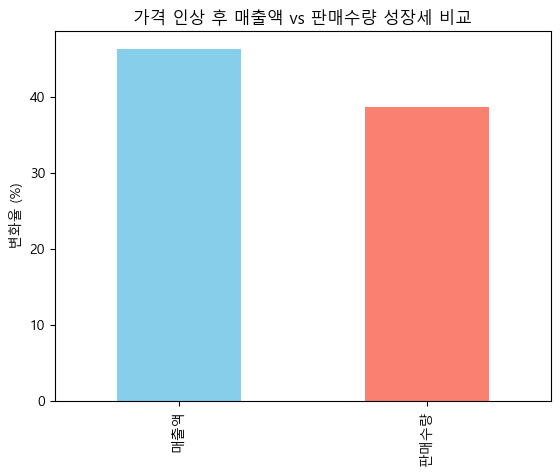

In [25]:
# 1. 지표 계산 (사용자님의 수치와 동일하게 계산)
before_stats = before_df.agg({'실제판매금액':'sum', '판매수량':'sum', '승인번호':'nunique'})
after_stats = after_df.agg({'실제판매금액':'sum', '판매수량':'sum', '승인번호':'nunique'})

# 2. 데이터프레임 구성
report = pd.DataFrame([before_stats, after_stats], index=['인상 전', '인상 후'])
report.columns = ['매출액', '판매수량', '방문건수']

# 3. 각 컬럼별 변화율 계산 (이게 정확한 방식입니다)
change_rate = (report.pct_change().iloc[1] * 100).round(2)

print("--- 가격 인상 전후 변화율 (%) ---")
print(change_rate)

# 시각화 (매출 vs 수량 변화 시각적 비교)
change_rate[['매출액', '판매수량']].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('가격 인상 후 매출액 vs 판매수량 성장세 비교')
plt.ylabel('변화율 (%)')
plt.show()

데이터가 말해주는 3가지 핵심 인사이트
"돈은 더 벌었지만, 사람들은 덜 샀다" (가격 저항의 증거)

**매출액(+46.4%)**이 **판매수량(+38.7%)**보다 훨씬 많이 늘었습니다. 이는 순수하게 '가격이 올랐기 때문에' 매출이 뻥튀기된 효과가 크다는 뜻입니다.

만약 가격 저항이 없었다면 매출액과 판매수량 증가율이 비슷했어야 합니다.

"날씨가 살렸지만, 1인당 구매량은 감소"

날씨가 풀리면서 방문객은 42.2%나 폭증했습니다. 하지만 **판매수량은 38.7%**밖에 안 늘었죠.

즉, 매장에 들어온 손님 한 명 한 명이 **"예전보다 아이스크림을 덜 집어갔다"**는 소리입니다. 가격이 비싸지니 장바구니에 담으려다 한두 개는 내려놓은 것이죠.

"객단가 상승폭이 너무 낮다" (+2.9%)

가격 인상폭이 꽤 컸음에도 불구하고 실제 고객이 결제하는 평균 금액은 겨우 160원(2.9%) 올랐습니다.

이는 고객들이 비싼 제품(콘, 샌드류)을 피하고 다시 저렴한 제품(바류)으로 눈을 돌렸거나, 비싼 제품을 살 때 개수를 줄였다는 강력한 신호입니다.

# 가격 변화에 민감했던 카테고리 분석



In [28]:
# 1. 카테고리별(분류) 판매수량 집계
# 인상 전(1~2월) 집계
cat_before = before_df.groupby('분류')['판매수량'].sum()
# 인상 후(3~4월) 집계
cat_after = after_df.groupby('분류')['판매수량'].sum()

# 2. 두 데이터를 합쳐서 비교표 생성
cat_report = pd.DataFrame({
    '인상 전(수량)': cat_before,
    '인상 후(수량)': cat_after
}).fillna(0) # 데이터가 없는 카테고리는 0으로 처리

# 3. 변화율(%) 계산
cat_report['수량 변화율(%)'] = ((cat_report['인상 후(수량)'] - cat_report['인상 전(수량)']) / cat_report['인상 전(수량)'] * 100).round(2)

# 4. 변화율이 낮은 순(발끈한 순)으로 정렬
cat_report = cat_report.sort_values(by='수량 변화율(%)')

print("--- [카테고리별] 가격 인상 후 수량 변화 (발끈한 순) ---")
display(cat_report)

--- [카테고리별] 가격 인상 후 수량 변화 (발끈한 순) ---


,인상 전(수량),인상 후(수량),수량 변화율(%)
분류,,,
젤리,486.0,436.0,-10.29
롯데과자,180.0,202.0,12.22
상품,3632.0,5392.0,48.46
이용안내,21.0,42.0,100.00


가장 발끈한 녀석: '젤리' (-10.29%) 🚨

방문객이 42% 늘었는데 판매량은 오히려 10%가 줄었습니다. * 해석: 아이스크림 가격이 오르니까 손님들이 **"아이스크림은 비싸도 사야겠지만, 같이 집던 젤리는 참자"**라고 반응한 것입니다. 부수적으로 사던 '군것질거리'가 가격 인상의 직격탄을 맞았습니다.

의외로 선방한 녀석: '상품' (+48.46%) ✅

이 '상품' 카테고리에 대부분의 아이스크림이 들어있는 것 같은데요, 증가율이 방문객 증가율(42.2%)보다 높습니다!

해석: 아이스크림 가격이 올랐음에도 불구하고, 성수기(봄) 효과 덕분에 아이스크림 자체의 수요는 탄탄하게 유지되었습니다.

애매하게 버틴 녀석: '롯데과자' (+12.22%) ⚠️

늘긴 했지만 방문객 증가율(42%)에 비하면 턱없이 낮습니다. 과자 역시 젤리처럼 '포기하기 쉬운 품목'으로 분류된 것이죠.

In [32]:
# 상품(아이스크림)을 쪼개볼까요

# 1. 가격대 그룹 나누기 함수 (동일)
def categorize_by_price(price):
    if price <= 600: return '저가(바류 추정)'
    elif price <= 1200: return '중가(콘/샌드 추정)'
    else: return '고가(홈타입/멀티팩 추정)'

# 2. 이미 필터링된 2개월치 데이터(before_df, after_df)에 그룹 적용
before_df['가격대그룹'] = before_df['판매가격_y'].apply(categorize_by_price)
after_df['가격대그룹'] = after_df['판매가격_y'].apply(categorize_by_price)

# 3. 가격대별 수량 합계 계산
price_group_before = before_df.groupby('가격대그룹')['판매수량'].sum()
price_group_after = after_df.groupby('가격대그룹')['판매수량'].sum()

# 4. 비교 데이터프레임 생성
price_report = pd.DataFrame({
    '인상 전(1~2월)': price_group_before,
    '인상 후(3~4월)': price_group_after
}).fillna(0)

# 5. 변화율(%) 계산
price_report['변화율(%)'] = ((price_report['인상 후(3~4월)'] - price_report['인상 전(1~2월)']) / price_report['인상 전(1~2월)'] * 100).round(2)

print("--- [정정된 2개월 비교] 가격대별 수량 변화율 ---")
display(price_report.sort_values(by='변화율(%)'))

--- [정정된 2개월 비교] 가격대별 수량 변화율 ---


,인상 전(1~2월),인상 후(3~4월),변화율(%)
가격대그룹,,,
고가(홈타입/멀티팩 추정),561.0,615.0,9.63
중가(콘/샌드 추정),1200.0,1709.0,42.42
저가(바류 추정),2679.0,3836.0,43.19


1. "비싼 놈은 안 집었다" (범인: 고가 제품)
방문객이 **42.2%**나 늘어난 상황인데, 투게더 같은 고가 제품은 겨우 9.6% 늘어나는 데 그쳤습니다. 사실상 날씨 효과를 전혀 못 누린 셈이죠. 가격이 비싸지니까 사람들이 가장 먼저 "에이, 비싼 건 다음에 먹자" 하며 장바구니에서 뺀 것입니다.

2. "아이스크림은 먹어야겠고..." (풍선 효과)
반면 **저가(바류)**와 **중가(콘/샌드)**는 방문객 증가율(42.2%)과 거의 비슷하게(42~43%) 늘었습니다.

해석: 손님들이 매장에는 왔지만, 비싼 제품 대신 비교적 가격 부담이 적은 바나 콘 제품으로 구매를 옮겨갔다는 것을 의미합니다.

3. 젤리(-10%)와 고가 아이스크림(+9.6%)의 상관관계
아까 젤리 판매량이 줄어든 것과 연결해 보면 그림이 완성됩니다.

고객의 심리: "아이스크림 가격이 올랐네? → 비싼 홈타입은 포기하자 → 대신 싼 바류를 사자 → 아, 돈 아까우니까 옆에 있던 젤리도 사지 말자."

가설: 단골들은 가격이 올라도 계속 왔을까? 아니면 단골들이 먼저 배신하고 발길을 끊었을까?

In [34]:
# 1. 고객별 방문 횟수 계산 (전체 기간 기준)
user_visits = merged_df.groupby(['매입사', '카드번호'])['승인번호'].nunique().reset_index()
user_visits.columns = ['매입사', '카드번호', '방문횟수']

# 2. 단골(3회 이상)과 일반(1~2회) 분류
def classify_user(visit_count):
    return '단골' if visit_count >= 3 else '일반'

user_visits['고객유형'] = user_visits['방문횟수'].apply(classify_user)

# 3. 원본 데이터에 고객유형 병합
merged_df = pd.merge(merged_df, user_visits[['매입사', '카드번호', '고객유형']], on=['매입사', '카드번호'], how='left')

# 4. 인상 전후 및 고객유형별 수량 집계
def get_user_type_report(df_before, df_after):
    before = df_before.groupby('고객유형')['판매수량'].sum()
    after = df_after.groupby('고객유형')['판매수량'].sum()
    
    report = pd.DataFrame({'인상 전': before, '인상 후': after})
    report['변화율(%)'] = ((report['인상 후'] - report['인상 전']) / report['인상 전'] * 100).round(2)
    return report

# 아까 만들어둔 before_df, after_df에 고객유형 반영
before_df = merged_df[(merged_df['승인일자'] >= '2022-01-01') & (merged_df['승인일자'] <= '2022-02-28')]
after_df = merged_df[(merged_df['승인일자'] >= '2022-03-01') & (merged_df['승인일자'] <= '2022-04-30')]

user_report = get_user_type_report(before_df, after_df)

print("--- [고객유형별] 가격 인상 후 반응 비교 ---")
display(user_report)

--- [고객유형별] 가격 인상 후 반응 비교 ---


,인상 전,인상 후,변화율(%)
고객유형,,,
단골,4332.0,6000.0,38.50
일반,108.0,160.0,48.15


In [36]:
# 1. 인상 전후 데이터에서 '단골'만 필터링
heavy_before_df = before_df[before_df['고객유형'] == '단골']
heavy_after_df = after_df[after_df['고객유형'] == '단골']

# 2. 단골 내에서의 가격대별 수량 합계 계산
heavy_price_before = heavy_before_df.groupby('가격대그룹')['판매수량'].sum()
heavy_price_after = heavy_after_df.groupby('가격대그룹')['판매수량'].sum()

# 3. 비교 데이터프레임 생성
heavy_price_report = pd.DataFrame({
    '인상 전(1~2월)': heavy_price_before,
    '인상 후(3~4월)': heavy_price_after
}).fillna(0)

# 4. 변화율(%) 계산
heavy_price_report['변화율(%)'] = ((heavy_price_report['인상 후(3~4월)'] - heavy_price_report['인상 전(1~2월)']) / heavy_price_report['인상 전(1~2월)'] * 100).round(2)

print("--- [단골 고객 대상] 가격대별 2개월(1~2월 vs 3~4월) 수량 변화율 ---")
display(heavy_price_report.sort_values(by='변화율(%)'))

--- [단골 고객 대상] 가격대별 2개월(1~2월 vs 3~4월) 수량 변화율 ---


,인상 전(1~2월),인상 후(3~4월),변화율(%)
가격대그룹,,,
고가(홈타입/멀티팩 추정),552.0,596.0,7.97
중가(콘/샌드 추정),1176.0,1659.0,41.07
저가(바류 추정),2604.0,3745.0,43.82


🔍 데이터가 말해주는 '단골의 속마음'
"비싼 건 절대 안 속아" (고가 제품의 철저한 외면)

전체 평균 증가율(+38.5%)에 비해 고가 제품은 겨우 7.9% 늘었습니다.

일반 고객을 포함했을 때(+9.63%)보다 단골들만 모았을 때 수치가 더 낮습니다.

해석: 우리 가게를 자주 오던 단골일수록 "투게더 가격이 이렇게 올랐어?"라며 더욱 민감하게 반응했고, 고가 제품 구매를 철저히 자제했습니다.

"아이스크림은 먹어야겠으니 '바'로 가자" (저가 제품으로의 쏠림)

저가(바류)의 증가율이 **43.8%**로 가장 높습니다.

해석: 단골들은 가게를 끊지는 않았지만, 지갑 사정을 고려해 비싼 콘이나 홈타입 대신 저렴한 바류를 더 많이 집어가는 방식으로 소비를 방어했습니다.

단골의 '의리' vs '실속'

단골들은 가격이 올라도 계속 방문해 주었지만(방문 의리), 결제 금액만큼은 철저히 **가성비 위주(실속)**로 챙겼습니다. 사장님 입장에서는 매출액은 올랐겠지만, 마진율이 높은 고가 제품의 회전이 안 되어 고민이 깊으셨을 구간이네요.

# 코호트분석

In [ ]:
# 1. '방문월' 컬럼 만들기 (이미 있다면 통과)
icecream['방문월'] = icecream['승인일자'].dt.to_period('M')

# 2. 고객별 첫 방문월 찾기
user_first_visit = icecream.groupby(['매입사', '카드번호'])['방문월'].min().reset_index()
user_first_visit.columns = ['매입사', '카드번호', '첫방문월']

# 3. 원본 데이터와 첫 방문 데이터 합치기
cohort_df = pd.merge(icecream, user_first_visit, on=['매입사', '카드번호'])

# 4. 경과 개월 수 계산 (수정된 부분: .astype(int) 사용)
# Period 객체를 정수로 변환하여 차이를 구합니다.
cohort_df['경과월'] = (cohort_df['방문월'].astype(int) - 
                     cohort_df['첫방문월'].astype(int))

# 5. 코호트 테이블 생성
cohort_pivot = cohort_df.pivot_table(index='첫방문월', 
                                    columns='경과월', 
                                    values='승인번호', 
                                    aggfunc='nunique') # 방문 건수(고객 수)로 집계

# 6. 유지율(%)로 변환
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0).round(4) * 100

print("--- [수정완료] 월별 코호트 유지율 (%) ---")
display(retention_matrix)

--- [수정완료] 월별 코호트 유지율 (%) ---


경과월,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
첫방문월,,,,,,,,,,,,,,,,,,
2021-02,100.0,165.70,173.43,209.66,236.71,260.39,228.50,198.07,166.18,125.12,116.91,120.77,91.79,128.50,164.25,195.17,215.94,37.2
2021-03,100.0,94.70,76.16,88.74,122.52,98.01,77.48,63.58,41.72,37.09,36.42,34.44,50.99,56.95,62.91,75.50,11.92,NaN
2021-04,100.0,64.81,61.11,83.33,35.19,40.74,53.70,22.22,33.33,27.78,24.07,25.93,53.70,44.44,59.26,3.70,NaN,NaN
2021-05,100.0,36.67,65.00,45.00,28.33,33.33,11.67,8.33,18.33,13.33,23.33,13.33,30.00,36.67,6.67,NaN,NaN,NaN
2021-06,100.0,35.19,59.26,51.85,31.48,27.78,24.07,18.52,24.07,27.78,35.19,53.70,57.41,3.70,NaN,NaN,NaN,NaN
2021-07,100.0,23.91,19.57,13.04,13.04,6.52,10.87,4.35,13.04,15.22,17.39,21.74,2.17,NaN,NaN,NaN,NaN,NaN
2021-08,100.0,26.92,34.62,15.38,3.85,3.85,3.85,7.69,15.38,7.69,19.23,3.85,NaN,NaN,NaN,NaN,NaN,NaN
2021-09,100.0,14.81,22.22,7.41,3.70,14.81,7.41,22.22,44.44,29.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10,100.0,23.81,23.81,19.05,NaN,4.76,9.52,14.29,23.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


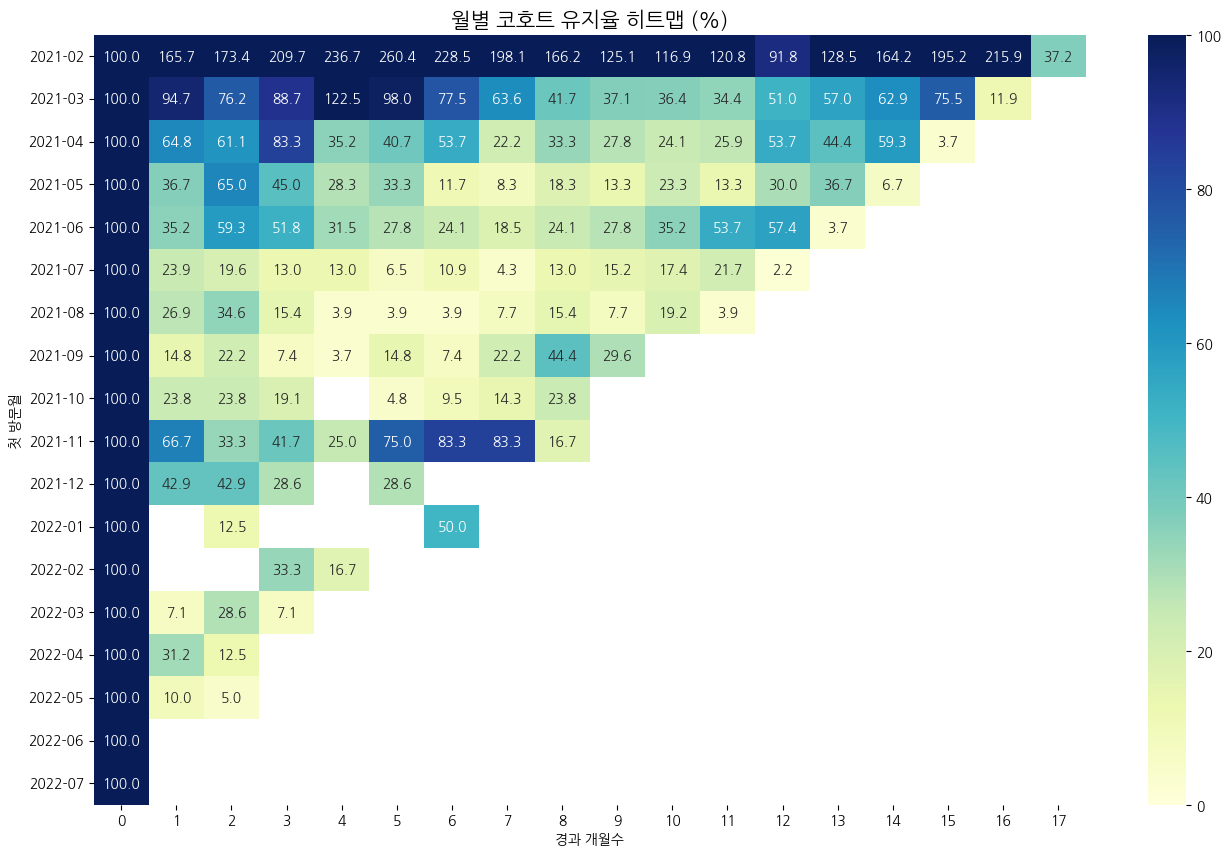

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 깨짐 방지 설정 (필요시)
plt.rc('font', family='NanumGothic') 

plt.figure(figsize=(16, 10))
sns.heatmap(retention_matrix, annot=True, fmt='.1f', cmap='YlGnBu', vmin=0, vmax=100)
plt.title('월별 코호트 유지율 히트맵 (%)', fontsize=15)
plt.ylabel('첫 방문월')
plt.xlabel('경과 개월수')
plt.show()

특정 구간에서 리텐션이 비어 있는 것은 고객의 재구매 주기가 불규칙하거나, 해당 시점에 고객의 시선을 끌 만한 **재방문 유인(프로모션 등)**이 부족했음을 시사합니다. 특히 미판매 상품 비중이 43%에 달하는 점을 고려할 때, 상품 라인업의 매력도를 높여 이 빈칸을 채우는 전략이 필요합니다."

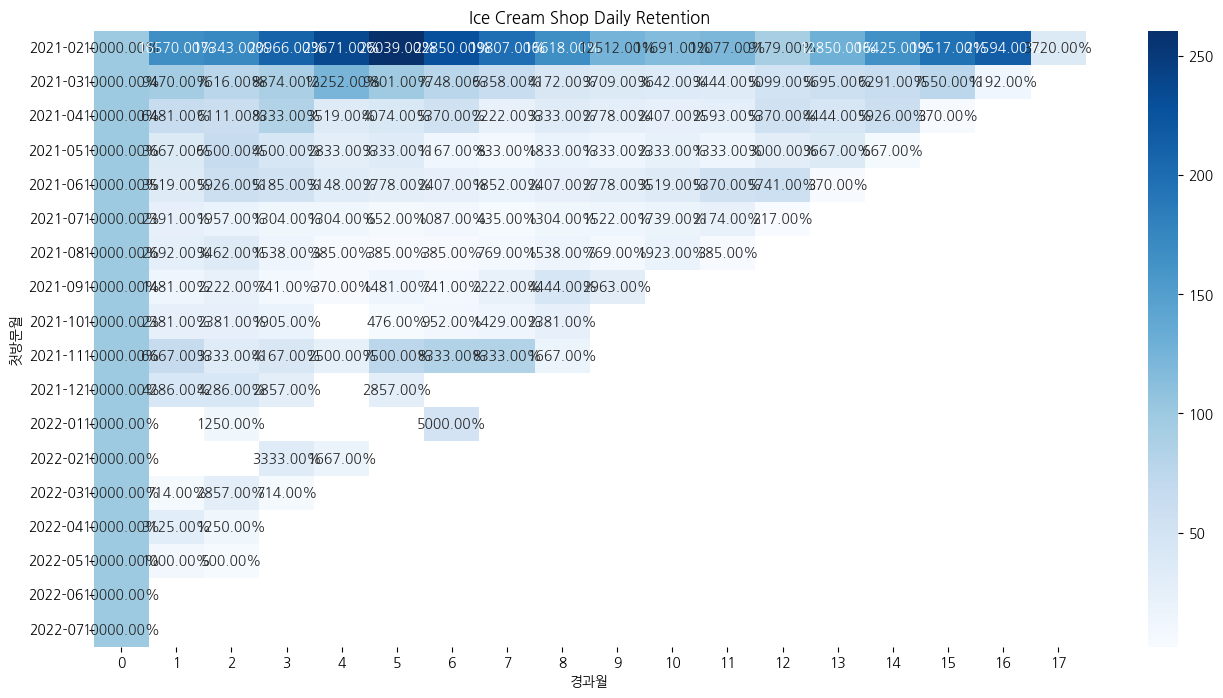

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터를 코호트 형태(Pivot table)로 변환했다고 가정 (retention_matrix)
plt.figure(figsize=(16, 8))
sns.heatmap(retention_matrix, 
            annot=True,       # 숫자 표시
            fmt='.2%',        # 백분율 형식
            cmap='Blues',     # 이미지와 같은 파란색 계열
            cbar=True)

plt.title('Ice Cream Shop Daily Retention')
plt.show()

In [42]:
# 1. 판매된 적이 있는 메뉴명 리스트 (중복 제거)
sold_items = icecream['메뉴명'].unique()

# 2. 전체 메뉴 리스트 중에서 판매 목록에 없는 상품 필터링
# menu_list의 '관리메뉴명'을 기준으로 비교합니다.
unsold_items = menu_list[~menu_list['관리메뉴명'].isin(sold_items)]

# 3. 결과 출력
print(f"전체 등록 상품 수: {len(menu_list)}개")
print(f"한 번이라도 팔린 상품 수: {len(sold_items)}개")
print(f"단 한 번도 팔리지 않은 상품 수: {len(unsold_items)}개")

print("\n--- [미판매 상품 목록] ---")
display(unsold_items[['분류', '관리메뉴명', '판매가격']])

전체 등록 상품 수: 1080개
한 번이라도 팔린 상품 수: 634개
단 한 번도 팔리지 않은 상품 수: 466개

--- [미판매 상품 목록] ---


,분류,관리메뉴명,판매가격
4,상품,바밤바,500
7,상품,녹차마루,500
25,상품,마카롱아이스바,500
26,상품,디저트앤치즈앤케이크,500
27,상품,디저트아이스바 브라우니,500
...,...,...,...
1082,젤리,바나나 스프레이,500
1096,젤리,에스더버니 구미,1000
1108,젤리,유산균 시크릿쥬쥬 딸기쮸,400
1134,젤리,스위트건,1800
